# Project: tmdb-movies Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project i will anlayze the tmdb-movies data set to investigate what are the trends assossiated with high reveneues and trends in movies through out the years.

In [1]:
# Importing libararies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

1) I read the data to a df.<br>
2) Checked the head of the data frame to see if loading happend correctly.
### General Properties

In [4]:
# Load your data and print out a few lines. Perform operations to inspect data
df = pd.read_csv("tmdb-movies .csv")
#   types and look for instances of missing or possibly errant data.
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


To see how many rows and columns there are in the data set

In [5]:
df.shape

(10866, 21)

For learning what are the statistical properities of the dataset for each feature.

In [6]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


Here i wanted to see how each feature is ditributed.

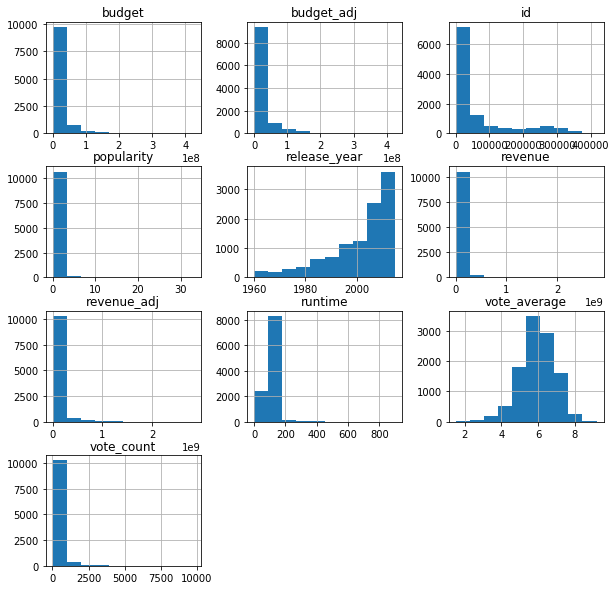

In [7]:
df.hist(figsize = (10,10));

To get insights on what values have missing data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

### Data Cleaning:
I only used data that have genres because i will be working later on finding the most popular genres and filled The Na data in production companies with a string to use functions later that willnot work on Na data.

In [9]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df = df.loc[df.genres.notna()]
df['production_companies'].fillna("UN Known",inplace = True)
#df.drop(df.loc[~df.genres.isna().values,:],inplace = True, axis = 0)

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 Which genres are more popular from year to year?
First i separated "release_year","genres","popularity" columns from the data set then i separated the genres in order to specifically see which genre for each year is the most popular over the year and for that i summed the popularity for each specific genre.

In [10]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
def q_1():
    df_genres = df.loc[:,["release_year","genres","popularity"]]
    df1 = df_genres.copy()
    df1['genres'] = df1['genres'].str.split('|')
    df1 = (df1
     .set_index(["release_year","popularity"])['genres']
     .apply(pd.Series)
     .stack()
     .reset_index()
     .drop('level_2', axis=1)
     .rename(columns={0:'genres'}))
    df1 = df1.groupby(['release_year','genres']).sum()
    df1 = df1.reset_index().set_index('release_year')
    for data in df1.index.unique():
        print(df1.loc[df1.popularity==df1.loc[df1.index == data,'popularity'].max(),:])
q_1()

             genres  popularity
release_year                   
1960          Drama    7.361967
             genres  popularity
release_year                   
1961          Drama    6.915731
             genres  popularity
release_year                   
1962          Drama    8.232008
                genres  popularity
release_year                      
1963          Thriller    7.199292
              genres  popularity
release_year                    
1964          Comedy    7.859657
             genres  popularity
release_year                   
1965          Drama    6.105756
             genres  popularity
release_year                   
1966          Drama    5.436264
             genres  popularity
release_year                   
1967          Drama    8.183477
             genres  popularity
release_year                   
1968          Drama     7.54645
             genres  popularity
release_year                   
1969          Drama    6.368528
             genres  popular

### Research Question 2  What are the properities associated with movies that have high revenues.

In [11]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
def q_2():
    df_rev = df.loc[df.revenue_adj > df.revenue_adj.mean()]
    return df_rev.describe()
q_2()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,2261.000000,2261.000000,2.261000e+03,2.261000e+03,2261.00000,2261.000000,2261.000000,2261.000000,2.261000e+03,2.261000e+03
mean,31956.323751,1.557742,4.920612e+07,1.765082e+08,113.05617,772.407784,6.306369,1999.214065,5.830409e+07,2.282261e+08
std,60133.554335,1.767902,4.891026e+07,2.046539e+08,24.06729,1051.490409,0.735536,12.460245,5.049916e+07,2.461158e+08
min,11.000000,0.010335,0.000000e+00,7.100000e+06,44.00000,10.000000,3.400000,1960.000000,0.000000e+00,5.152769e+07
25%,2157.000000,0.665367,1.500000e+07,6.180197e+07,98.00000,164.000000,5.800000,1992.000000,2.203826e+07,8.361457e+07
50%,9919.000000,1.102836,3.500000e+07,1.070717e+08,110.00000,379.000000,6.300000,2002.000000,4.466253e+07,1.421194e+08
75%,21845.000000,1.832434,7.000000e+07,2.066784e+08,124.00000,929.000000,6.800000,2009.000000,8.102293e+07,2.682159e+08
max,417859.000000,32.985763,3.800000e+08,2.781506e+09,705.00000,9767.000000,8.300000,2015.000000,3.683713e+08,2.827124e+09


### Research Question 3  What year has seen the most releases?

In [12]:
def q_3():
    df_years = df.groupby("release_year")
    return df_years.size().idxmax()
q_3()

2014

### Research Question 4 What is the relationship between budget and revenue?

C:\Users\Dell\Anaconda3\lib\site-packages\pandas\core\generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
C:\Users\Dell\Anaconda3\lib\site-packages\pandas\core\generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


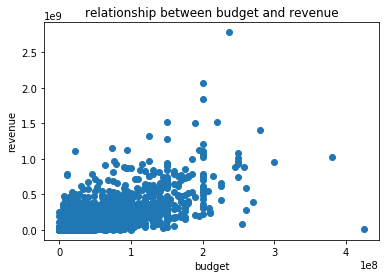

In [13]:
def q_4():
    df_bud_rev = df[['budget','revenue']]
    df_bud_rev['budget'].replace(to_replace = 0,value = df_bud_rev['budget'].mean(),inplace =True)
    df_bud_rev['revenue'].replace(to_replace = 0,value = df_bud_rev['revenue'].mean(),inplace =True)
    #df_bud_rev.head()
    plt.scatter(df_bud_rev.budget,df_bud_rev.revenue)
    plt.xlabel('budget')
    plt.ylabel('revenue')
    plt.title('relationship between budget and revenue')
    df_bud_rev.shape
q_4()

For the previous plot we can see that there is a correlation between budget and revenue a positive one and we can see that there are outliers and some movies had small revenue despite having large budgets, also i removed all the 0 values in both revenue and budget for Convenience.

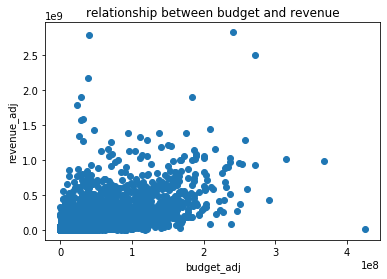

In [14]:
def q_4_2():
    df_bud_rev = df[['budget_adj','revenue_adj']]
    df_bud_rev['budget_adj'].replace(to_replace = 0,value = df_bud_rev['budget_adj'].mean(),inplace =True)
    df_bud_rev['revenue_adj'].replace(to_replace = 0,value = df_bud_rev['revenue_adj'].mean(),inplace =True)
    plt.scatter(df_bud_rev.budget_adj,df_bud_rev.revenue_adj)
    plt.xlabel('budget_adj')
    plt.ylabel('revenue_adj')
    plt.title('relationship between budget and revenue')
q_4_2()

For the previous plot we can see that there is a correlation between budget and revenue a positive one and we can see that there are outliers and some movies had small revenue despite having large budgets but here we can see more outliers than before  also i removed all the 0 values in both revenue_adj and budget_adj for Convenience.

### Research Question 5 which group of production companies have the most revenue of all time?

In [15]:
def q_5():
    df_com_rev = df.loc[:,['production_companies','revenue_adj']]
    return df_com_rev.loc[df.revenue_adj == df.revenue_adj.max(),'production_companies'].values
q_5()

array(['Ingenious Film Partners|Twentieth Century Fox Film Corporation|Dune Entertainment|Lightstorm Entertainment'],
      dtype=object)

### Research Question 6 which production company has the most revenue of all time?

In [16]:
def q_6():
    df1 = df.loc[:,['production_companies','revenue_adj']]
    df1['production_companies'] = df1['production_companies'].str.split('|')
    df1 = (df1
     .set_index(['revenue_adj'])['production_companies']
     .apply(pd.Series)
     .stack()
     .reset_index()
     .drop('level_1', axis=1)
     .rename(columns={0:'production_companies'}))
    df1 = df1.groupby('production_companies')
    return df1['revenue_adj'].sum().idxmax()
q_6()

'Warner Bros.'

### Research Question 7 what is the run time that most movies hava?

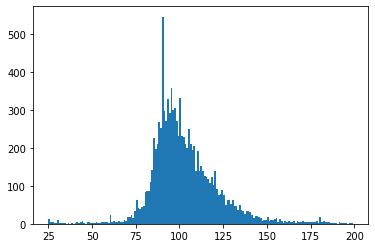

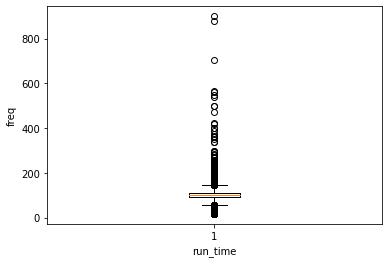

In [17]:
def q_7():
    df_rt = df.loc[df.runtime > 15,'runtime']
    plt.hist(df_rt,bins = np.arange(25,200));
    plt.show()
    plt.xlabel("run_time")
    plt.ylabel('freq')
    plt.boxplot(df_rt);
q_7()

By removing outliers and ploting a histogram of the run time we can see that most movies' run time is approximately less than 85 and there are alot of outliers that made the mean large as shown by the boxplot.

<a id='conclusions'></a>
## Conclusions

From the analysis we can see that each year have a different popular genre and we also can see some properties associated with higher revenues and that warnerbros is the company with the highest revenues of all time despite not being in the group of production companies with the highst revenue_adj of all time and we can see that the budget and revenue have a mild positive relationship also the budget_adj and revenue_adj, we can see aswell that 2014 has seen the most movies releases and we can see that drama, comedy,action and thriller are the most popular genres across the years.
One of the limitations I faced was that movies aren't given a one specified genre and i wanted to know what genre exactly dominated this year specifically i wanted to know exactly which genre dominated each movie, movies could not be updated and as such my exploration is biased to older movies, the newer ones could potentially change my insights.

In [19]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'tmdb-movies investigation.ipynb'])

0